### Predicting Viral Host based on Metagenomic Features

In this notebook, metagenomic features taken from a viral genome are used to predict the type of virus host. The efficacy of these features is then evaluated. 

You should note two things:
* The dataset is taken from the viruses.csv file, please make sure it is in your directory.
* The data contains metagenomic info from 7362 unique viral genomes and their known characteristics

In [89]:
# import libraries
import pandas as pd
import numpy as np
import os

In [90]:
# read in the data set and print out first 5 rows
virus_csv_file = 'data/viruses.csv'
viruses_df = pd.read_csv(virus_csv_file)
viruses_df.head(5)

,#Organism Name,Organism Groups,BioSample,BioProject,Assembly,Level,Size(Mb),GC%,Replicons,Host,CDS,Neighbors,Release Date,GenBank FTP,RefSeq FTP,Replicons.1
0,Hamiltonella virus APSE1,"Viruses;dsDNA viruses, no RNA stage;Podoviridae",NaN,PRJNA14047,GCA_000837745.1,Complete,0.036524,43.900,Unknown:NC_000935.1/AF157835.1,bacteria,54,NaN,1999-10-26T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_000935.1/AF157835.1
1,Chalara elegans RNA Virus 1,Viruses;dsRNA viruses;Totiviridae,NaN,PRJNA15126,GCA_000858705.1,Complete,0.005310,52.600,Unknown:NC_005883.1/AY561500.1,fungi,2,NaN,2004-03-23T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_005883.1/AY561500.1
2,Vibrio phage martha 12B12,"Viruses;dsDNA viruses, no RNA stage;Myoviridae",NaN,PRJNA39219,GCA_000904715.1,Complete,0.033277,45.800,Unknown:NC_021070.1/HQ316581.1,bacteria,51,NaN,2013-03-11T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_021070.1/HQ316581.1
3,Sclerotinia sclerotiorum partitivirus S,Viruses;dsRNA viruses;Partitiviridae,NaN,PRJNA39595,GCA_000884095.1,Complete,0.003726,44.145,RNA 1:NC_013014.1/GQ280377.1; RNA 2:NC_01301...,plants,2,NaN,2009-07-21T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,RNA 1:NC_013014.1/GQ280377.1; RNA 2:NC_01301...
4,Human papillomavirus 116,"Viruses;dsDNA viruses, no RNA stage;Papillomav...",NaN,PRJNA39691,GCA_000884175.1,Complete,0.007184,38.500,Unknown:NC_013035.1/FJ804072.1,vertebrates,7,NaN,2009-07-28T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_013035.1/FJ804072.1


In [100]:
# clean up column names i.e. remove the erroneous characters from the column names (spaces, percent sign, etc.)

# clean up column names https://stackoverflow.com/a/11346337/6542644 
viruses_df.columns = ['organism_name', 'organism_groups', 'BioSample', 'Bioproject', 'Assembly', 'Level', 'size_mb', 'gc_percent', 'replicons', 'host', 'cds', 'neighbours', 'release_date', 'genbank_ftp', 'refseq_ftp', 'replicons1']

# verify column names have been changed
viruses_df.head(1)

,organism_name,organism_groups,BioSample,Bioproject,Assembly,Level,size_mb,gc_percent,replicons,host,cds,neighbours,release_date,genbank_ftp,refseq_ftp,replicons1
0,Hamiltonella virus APSE1,"Viruses;dsDNA viruses, no RNA stage;Podoviridae",NaN,PRJNA14047,GCA_000837745.1,Complete,0.036524,43.9,Unknown:NC_000935.1/AF157835.1,bacteria,54,NaN,1999-10-26T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_000935.1/AF157835.1


In [101]:
#Explore the data

# .shape[0] gives the number of rows in the dataframe, which is the number of viral species in the dataset
print('Number of viruses: ', viruses_df.shape[0])

# .unique gives the number of unique items in a specified column, in this case the number of viral hosts
print('Number of unique viral host types: ', (len(viruses_df['host'].unique())))

viruses_df['host'].unique()



Number of viruses:  7362
Number of unique viral host types:  14


array(['bacteria', 'fungi', 'plants', 'vertebrates', 'invertebrates',
       'protozoa', 'vertebrates, invertebrates, human',
       'invertebrates, plants', 'algae', 'vertebrates, invertebrates',
       'vertebrates, human', 'archaea', 'human', nan], dtype=object)

In [103]:
# Generate ONE HOT ENCODED values in case mult-class classification does not have good accuracy

ohe_df = pd.get_dummies(viruses_df['host'], prefix='host')
ohe_df.head(5)



,host_algae,host_archaea,host_bacteria,host_fungi,host_human,host_invertebrates,"host_invertebrates, plants",host_plants,host_protozoa,host_vertebrates,"host_vertebrates, human","host_vertebrates, invertebrates","host_vertebrates, invertebrates, human"
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0


In [107]:
# drop columns we don't need 
virus_feats_only = viruses_df.drop(['organism_name', 'organism_groups', 'BioSample', 
                                    'Bioproject', 'Assembly', 'Level', 'replicons', 
                                    'neighbours', 'release_date', 'genbank_ftp', 'refseq_ftp',
                                   'replicons1'], axis=1)


# create dict to map strings to numerical values, also combines overlapping hosts: vertebrates/human and human
viruses_host_dict = {'bacteria': 0, 'fungi': 1, 'plants': 2, 'vertebrates': 3,
                    'invertebrates': 4, 'protozoa': 5, 'vertebrates, invertebrates, human': 6,
                    'invertebrates, plants': 7, 'algae': 8, 'vertebrates, invertebrates': 9,
                    'vertebrates, human': 10, 'archaea': 11, 'human': 10}

# replace method use cited from: https://stackoverflow.com/a/20250996/6542644 
virus_feats_cleanhost = virus_feats_only.replace({'host':viruses_host_dict})

first_col = virus_feats_cleanhost.pop('host')
virus_feats_cleanhost.insert(0, 'host', first_col)
virus_feats_cleanhost.head(5)

,host,size_mb,gc_percent,cds
0,0.0,0.036524,43.900,54
1,1.0,0.005310,52.600,2
2,0.0,0.033277,45.800,51
3,2.0,0.003726,44.145,2
4,3.0,0.007184,38.500,7


In [108]:
# check for NaN values in data

print("Count of NaN in host: ", virus_feats_cleanhost['host'].isnull().sum())
print("Count of NaN in Size_Mb: ", virus_feats_cleanhost['size_mb'].isnull().sum())
print("Count of NaN in GC_percent: ", virus_feats_cleanhost['gc_percent'].isnull().sum())
print("Count of NaN in cds: ", virus_feats_cleanhost['cds'].isnull().sum())

viruses_dropped_nan = virus_feats_cleanhost.dropna()

# count of NaN values in a column cited from: https://datatofish.com/check-nan-pandas-dataframe/

print("Count of NaN after dropna(): ", viruses_dropped_nan['host'].isnull().sum())

viruses_dropped_nan.head(5)
display(viruses_dropped_nan)


Count of NaN in host:  8
Count of NaN in Size_Mb:  0
Count of NaN in GC_percent:  0
Count of NaN in cds:  0
Count of NaN after dropna():  0


,host,size_mb,gc_percent,cds
0,0.0,0.036524,43.9000,54
1,1.0,0.005310,52.6000,2
2,0.0,0.033277,45.8000,51
3,2.0,0.003726,44.1450,2
4,3.0,0.007184,38.5000,7
...,...,...,...,...
7357,10.0,0.018039,31.7387,12
7358,10.0,0.018615,33.5171,11
7359,10.0,0.018615,32.9612,11
7360,10.0,0.018039,31.9355,11


### Distribution of Data

We will look at the distribution of our viral hosts (target) and our features. Class imbalances may affect our results. Here we ask: **How evenly is our data distributed among different meta-genomic features and viral hosts?**


In [56]:
# Check distribution of viral hosts
counts_host2 = viruses_dropped_nan.copy()
counts_host_unique = counts_host2.groupby(['host']).size().reset_index(name='Counts')

counts_host_unique

,host,Counts
0,0.0,3787
1,1.0,55
2,2.0,306
3,3.0,550
4,4.0,107
5,5.0,34
6,6.0,8
7,7.0,11
8,8.0,34
9,9.0,17


([<matplotlib.axis.XTick at 0x7f0cfc5b4748>,
 <a list of 12 Text xticklabel objects>)

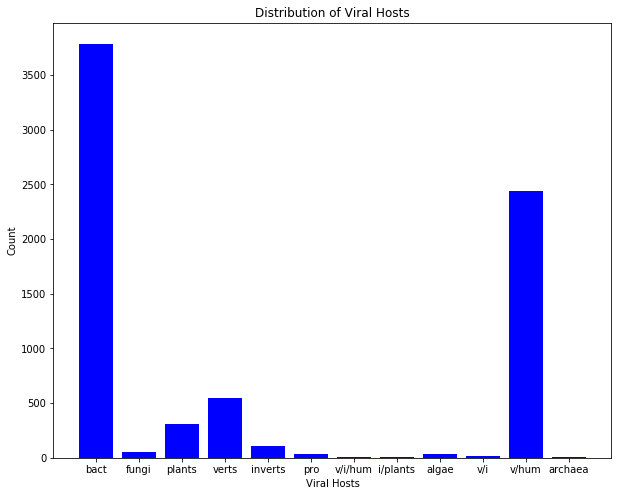

In [109]:
# Plot distribution of viral hosts

import matplotlib.pyplot as plt
%matplotlib inline

group = ['host']
counts = viruses_dropped_nan.groupby(group).size().reset_index(name="Counts")

# use of plt cited from: https://python-graph-gallery.com/4-add-title-and-axis-label/
bars = ('bact', 'fungi', 'plants', 'verts', 'inverts',
        'pro', 'v/i/hum',
        'i/plants', 'algae', 'v/i',
        'v/hum', 'archaea')
y_pos = np.arange(len(bars))

#plt.title('Distribution of Unique Host Types')
plt.figure(figsize=(10,8))
plt.bar(range(len(counts)), counts['Counts'], color = 'blue')
plt.title('Distribution of Viral Hosts')
plt.xlabel('Viral Hosts')
plt.ylabel('Count')
plt.xticks(y_pos, bars)


Number of unique size values:  5233
count    7354.000000
mean        0.051478
std         0.055856
min         0.000174
25%         0.017989
50%         0.033620
75%         0.057982
max         0.497513
Name: size_mb, dtype: float64
mode of Size_Mb is:  0    0.017433
dtype: float64
count zeroes is:  0


Text(0, 0.5, 'Count')

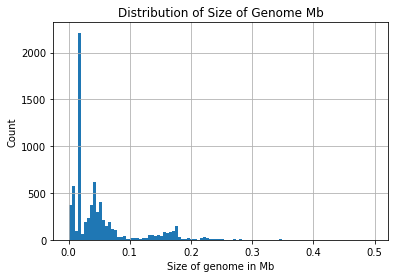

In [110]:
# Get stats for viral genome size (size_mb) and plot distribution

print('Number of unique size values: ', (len(viruses_dropped_nan['size_mb'].unique())))

print(viruses_dropped_nan.size_mb.describe())

print("mode of Size_Mb is: ", viruses_dropped_nan['size_mb'].mode())

# replace values of 0 with the mean cited from: https://stackoverflow.com/a/11455375/6542644
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=0, strategy = 'mean')

cleaned_sizemb_df = viruses_dropped_nan['size_mb']

drop_host = viruses_dropped_nan.drop(['host'], axis=1)

imp.fit(drop_host)

cleaned_df = imp.transform(drop_host)

cleaned_df = pd.DataFrame(data=cleaned_df, columns=["size_mb", "gc_percent", "cds"])

cleaned_size = cleaned_df['size_mb']

print("count zeroes is: ", cleaned_size.isin([0]).sum())

cleaned_size = cleaned_size.sort_values()
cleaned_size.hist(bins = 100)
plt.title('Distribution of Size of Genome Mb')
plt.xlabel('Size of genome in Mb')
plt.ylabel('Count')


Number of unique GC% values:  2789
count    7362.000000
mean       43.230327
std        11.971189
min         0.000000
25%        32.370900
50%        39.500000
75%        51.600000
max        78.800000
Name: gc_percent, dtype: float64
Most frequent value is  0    42.2
dtype: float64


Text(0, 0.5, 'Count')

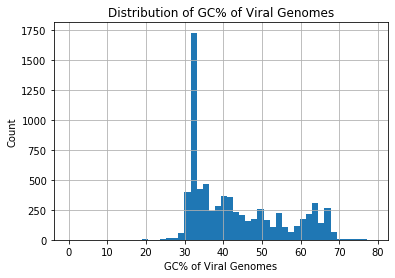

In [111]:
# Get stats for GC% (gc_percent) and plot distribution

print('Number of unique GC% values: ', (len(viruses_df['gc_percent'].unique())))

print(viruses_df.gc_percent.describe())

gc_sorted_df = viruses_df['gc_percent']
gc_sorted_df = gc_sorted_df.sort_values()

print('Most frequent value is ', gc_sorted_df.mode() )
gc_sorted_df.hist(bins = 50)
plt.title('Distribution of GC% of Viral Genomes')
plt.xlabel('GC% of Viral Genomes')
plt.ylabel('Count')


Number of unique CDS values:  363
count    7362.000000
mean       67.090736
std        80.363440
min         0.000000
25%        11.000000
50%        46.000000
75%        90.000000
max       886.000000
Name: cds, dtype: float64
Most frequent value is  0    11
dtype: int64
count zeroes is  32


Text(0, 0.5, 'Count')

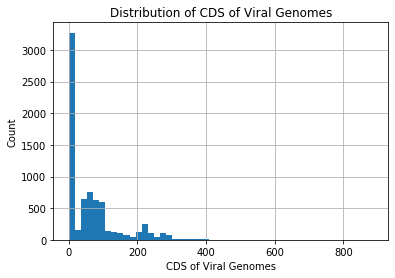

In [112]:
# Get stats for CDS (cds) and plot distribution

print('Number of unique CDS values: ', (len(viruses_df['cds'].unique())))

print(viruses_df.cds.describe())

cds_sorted_df = viruses_df['cds']
cds_sorted_df = cds_sorted_df.sort_values()

print('Most frequent value is ', cds_sorted_df.mode() )

print('count zeroes is ', cds_sorted_df.isin([0]).sum() )

cds_sorted_df.hist(bins = 50)
plt.title('Distribution of CDS of Viral Genomes')
plt.xlabel('CDS of Viral Genomes')
plt.ylabel('Count')

In [114]:
# Pre-process Data

from sklearn import preprocessing

new_viral_df = viruses_dropped_nan.copy()

targets_host = new_viral_df.pop('host')

x = new_viral_df.values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

unclean_viral_df = pd.DataFrame(x_scaled)

unclean_viral_df.insert(0, 'host', targets_host)

# remove the NaN values!
new_df_clean = unclean_viral_df.dropna()

new_df_clean.columns = ['host', 'size_mb', 'gc_percent', 'cds']
new_df_clean.head(5)



,host,size_mb,gc_percent,cds
0,0.0,0.073089,0.557107,0.060948
1,1.0,0.010327,0.667513,0.002257
2,0.0,0.066560,0.581218,0.057562
3,2.0,0.007142,0.560216,0.002257
4,3.0,0.014095,0.488579,0.007901


In [115]:
# Prep the data: generate X and y

# create features and labels
y = new_df_clean['host']
X = new_df_clean.drop(['host'], axis=1)
y.columns = ['host']

# X.head(5)


In [116]:
# SVM usage cited from: https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# start with linear kernel

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
                                            
linear_pred = linear.predict(X_test)

# retrieve accuracy
accuracy_lin = linear.score(X_test, y_test)

print("acc linear kernel: ", accuracy_lin)

cm_lin = confusion_matrix(y_test, linear_pred)
print(cm_lin)


acc linear kernel:  0.7959183673469388
[[710   0   0   0   0   0   0   0   0  34   0]
 [ 11   0   0   0   0   0   0   0   0   0   0]
 [ 43   0   0   0   0   0   0   0   0  28   0]
 [ 81   0   0   0   0   0   0   0   0  30   0]
 [ 21   0   0   0   0   0   0   0   0   1   0]
 [ 10   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   2   0]
 [  8   0   0   0   0   0   0   0   0   1   0]
 [  3   0   0   0   0   0   0   0   0   2   0]
 [ 20   0   0   0   0   0   0   0   0 460   0]
 [  2   0   0   0   0   0   0   0   0   0   0]]


In [117]:
# now try rbf kernel

rbf = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)

accuracy_rbf = rbf.score(X_test, y_test)
print("acc rbf kernel: ", accuracy_rbf)

cm_rbf = confusion_matrix(y_test, linear_pred)
print(cm_rbf)

acc rbf kernel:  0.845578231292517
[[710   0   0   0   0   0   0   0   0  34   0]
 [ 11   0   0   0   0   0   0   0   0   0   0]
 [ 43   0   0   0   0   0   0   0   0  28   0]
 [ 81   0   0   0   0   0   0   0   0  30   0]
 [ 21   0   0   0   0   0   0   0   0   1   0]
 [ 10   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   2   0]
 [  8   0   0   0   0   0   0   0   0   1   0]
 [  3   0   0   0   0   0   0   0   0   2   0]
 [ 20   0   0   0   0   0   0   0   0 460   0]
 [  2   0   0   0   0   0   0   0   0   0   0]]


In [118]:
# now try with cross validation!

from sklearn.model_selection import cross_val_score

clf_cross_val = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo')

# use of cross_val_score cited from: https://scikit-learn.org/stable/modules/cross_validation.html

scores = cross_val_score(clf_cross_val, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))










/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 0.86 (+/- 0.11)
